In [135]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
from datetime import datetime,timedelta
import os
import copy
import numpy as np

In [136]:
list_file =  glob.glob("CSV/*")
# test = list_file
liste_transi = copy.copy(list_file)
list_remove = []
list_concat = []
for file in list_file:
    for file_2 in list_file:
        file_trans = file.split("\\")[1].split("__")
        file_2_trans = file_2.split("\\")[1].split("__")
        file_date = datetime.strptime(file_trans[-1].replace(".csv",""), '%Y_%m_%d_%H_%M')
        file_2_date = datetime.strptime(file_2_trans[-1].replace(".csv",""), '%Y_%m_%d_%H_%M')
        if ((file_trans[1]+"__"+file_trans[int(len(file_trans)/2)] ==  file_2_trans[1]+"__"+file_2_trans[int(len(file_2_trans)/2)]) and ((file_date-timedelta(days=7))<= file_2_date<= (file_date + timedelta(days=7))) and (file in liste_transi) and (file_2 in liste_transi) and (file!=file_2)) :  
            if file_2_date<file_date:
                file_stay = file
                file_delete = file_2
            else:
                file_stay = file_2
                file_delete = file



            df_stay = pd.read_csv(file_stay)
            df_delete = pd.read_csv(file_delete)

            df_stay = pd.concat([df_stay,df_delete], ignore_index=True)

            del df_stay["Unnamed: 0"]
            df_stay['Date'] = pd.to_datetime(df_stay['Date'], format=('%Y-%m-%d %H:%M:%S'))
            df_stay = df_stay.sort_values(by='Date')
            df_stay.to_csv(file_stay)

            try:
                liste_transi.remove(file_delete)
                os.remove(file_delete)
                
                list_remove.append(file_delete)
                list_concat.append(file_stay)
                # print("Remove ==> {}".format(file_delete))
            except:
                # print("Not Remove ==> {}".format(file_delete))
                # print("list : {}".format(liste_transi))
                pass
        # else:
        #     # print("ici ",end="")

for file in list_file:
    if file in list_remove:
        print("\033[91m"+file+"\x1b[0m")
    elif file in list_concat:
        print("\033[92m"+file+"\x1b[0m")
    else:
        print(file)


# print(list_remove)

CSV\tennis__Albert_Ramos-Vinolas__Lorenzo_Musetti__2022_10_24_13_30.csv
CSV\tennis__Alejandro_Davidovich_Fokina__Miomir_Kecmanovic__2022_10_24_13_30.csv
CSV\tennis__Alex_De_Minaur__Holger_Vitus_Nodskov_Rune__2022_10_24_13_30.csv
CSV\tennis__Alex_Molcan__Mackenzie_McDonald__2022_10_24_13_30.csv
CSV\tennis__Andrey_Rublev__Diego_Schwartzman__2022_10_24_18_50.csv
CSV\tennis__Anna_Kalinskaya__Marie_Bouzkova__2022_10_22_03_15.csv
CSV\tennis__Arevalo_M____Rojer_J__Glasspool_L____Heliovaara_H__2022_10_23_13_10.csv
CSV\tennis__Botic_Van_De_Zandschulp__Adrian_Mannarino__2022_10_24_13_30.csv
CSV\tennis__Brandon_Nakashima__David_Goffin__2022_10_24_13_30.csv
CSV\tennis__Carlos_Alcaraz_Garfia__Jack_Draper__2022_10_24_13_30.csv
CSV\tennis__Cristian_Garin__Jannik_Sinner__2022_10_25_13_00.csv
CSV\tennis__Daniel_Evans__Felix_Auger_Aliassime__2022_10_21_20_50.csv
CSV\tennis__Daniil_Medvedev__Nikoloz_Basilashvili__2022_10_25_13_00.csv
CSV\tennis__Dennis_Novak__Stefanos_Tsitsipas__2022_10_25_13_00.csv
CSV\

In [131]:
list_file =  glob.glob("CSV/*")
plot_list = []
for file in list_file:
    # file = list_file[0]
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'], format=("%Y-%m-%d %H:%M:%S"))
    df = df.sort_values(by='Date')
    cote_win = df.Win.tolist()
    cote_lose = df.Lose.tolist()    
    
    date = df.Date.tolist()
    # for i in df.Date.tolist():
    #     # trani = 
    #     date.append(datetime.strptime(i, '%d-%m-%Y_%H:%M:%S'))
    name = file.split("\\")[1].split("__")
    # print(name[-1].replace('.csv',''))
    date_live = (datetime.strptime((name[-1].replace('.csv','')), '%Y_%m_%d_%H_%M'))
    # print(date_live)
    # elem = 'two' if 'two' in my_list else None
    # print(type(date_live))

    if len(name) == 4:
        name = (name[1]+" - "+name[2]).replace("_"," ")
    elif len(name) == 8:
        name = (name[1]+"/"+name[3]+" - "+name[4]+"/"+name[6]).replace("_"," ")
    else:
        print("len(name) not 4 and 8 : {}".format(name))
    plot_list.append([name,date,cote_win,cote_lose,date_live])

Albert Ramos-Vinolas - Lorenzo Musetti            || 4.2    --   1.24  ==>    -4.26 %            X  
Alejandro Davidovich Fokina - Miomir Kecmanovic   || 2.1    --   1.74  ==>    -4.84 %            X  
Alex De Minaur - Holger Vitus Nodskov Rune        || 6.2    --   6.75  ==>    223.17 %           V  
Alex Molcan - Mackenzie McDonald                  || 2.3    --   1.64  ==>    -4.26 %            X  
Andrey Rublev - Diego Schwartzman                 || 1.16   --   6.25  ==>    -2.16 %            X  
Anna Kalinskaya - Marie Bouzkova                  || 2.95   --   1.42  ==>    -4.14 %            X  
Arevalo M/Rojer J - Glasspool L/Heliovaara H      || 1.86   --   35.0  ==>    76.61 %            V  
Botic Van De Zandschulp - Adrian Mannarino        || 1.58   --   2.47  ==>    -3.64 %            X  
Brandon Nakashima - David Goffin                  || 1.52   --   2.55  ==>    -4.77 %            X  
Carlos Alcaraz Garfia - Jack Draper               || 1.43   --   2.9   ==>    -4.23 %      

C:\Users\User\AppData\Local\Temp\ipykernel_16752\1870207089.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Krejcikova B/Siniakova K - Kichenok L/Ostapenko J || 1.39   --   2.75  ==>    -7.67 %            X  
Lorenzo Musetti - Matteo Berrettini               || 2.35   --   2.48  ==>    20.66 %            V  
Lorenzo Sonego - Emil Ruusuvuori                  || 2.4    --   1.58  ==>    -4.72 %            X  
Mackenzie McDonald - Matteo Berrettini            || 17.0   --   1.76  ==>    59.49 %            V  
Maria Sakkari - Marie Bouzkova                    || 2.0    --   2.8   ==>    16.67 %            V  
Matteo Berrettini - Daniel Evans                  || 1.56   --   2.45  ==>    -4.69 %            X  
Maxime Cressy - Dominic Stephan Stricker          || 1.5    --   2.6   ==>    -4.88 %            X  
Miomir Kecmanovic - Lorenzo Musetti               || 40.0   --   2.28  ==>    115.70 %           V  
Pablo Carreno-Busta - Miomir Kecmanovic           || 1.52   --   2.15  ==>    -10.95 %           X  
Richard Gasquet - David Goffin                    || 2.55   --   1.54  ==>    -3.99 %      

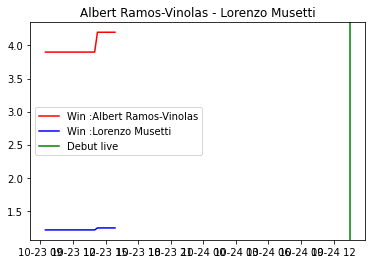

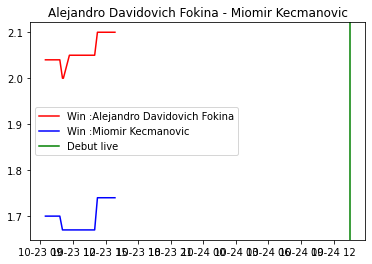

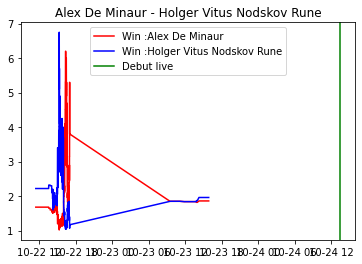

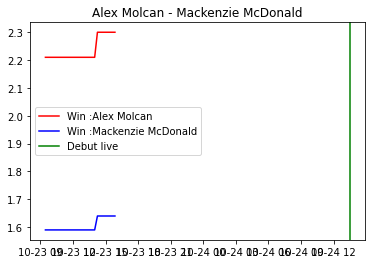

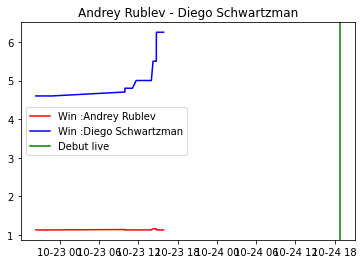

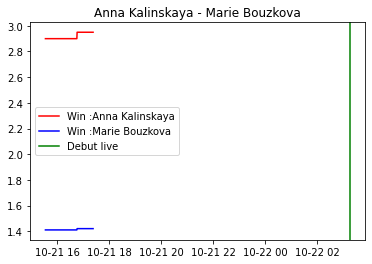

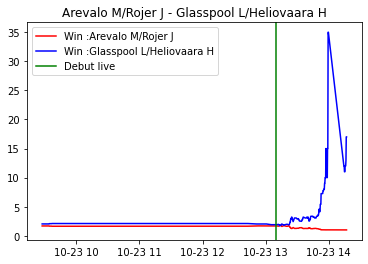

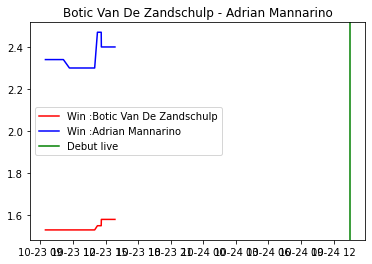

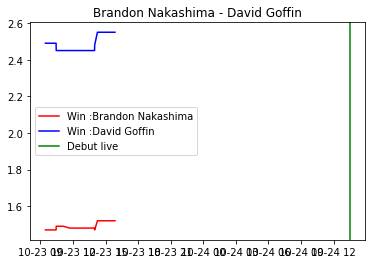

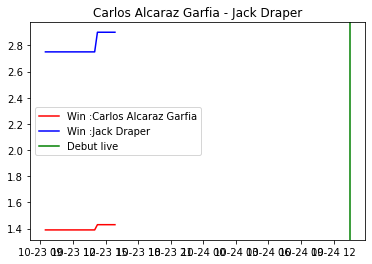

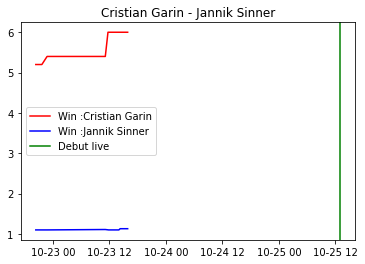

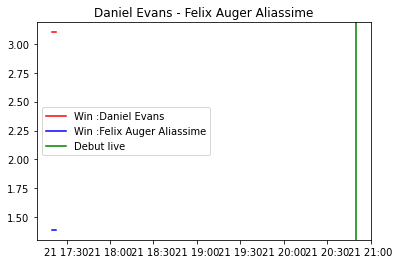

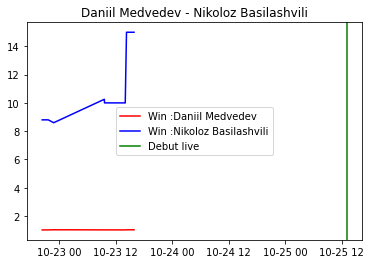

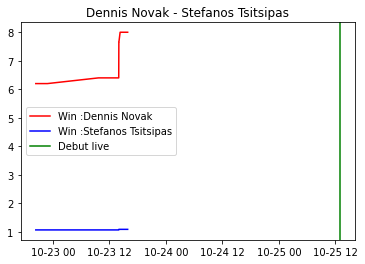

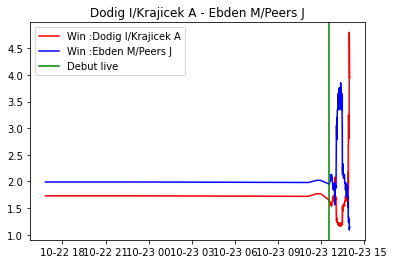

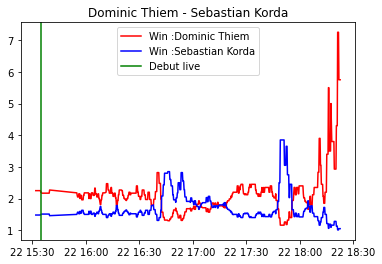

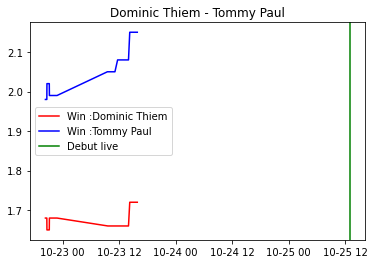

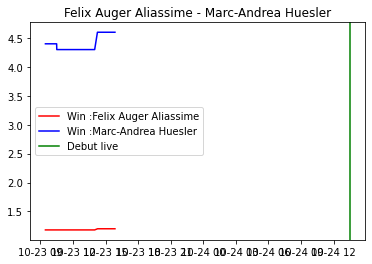

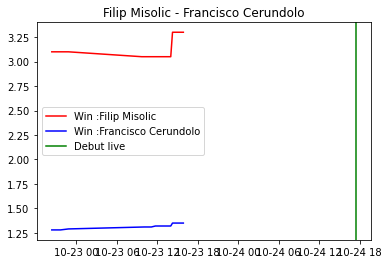

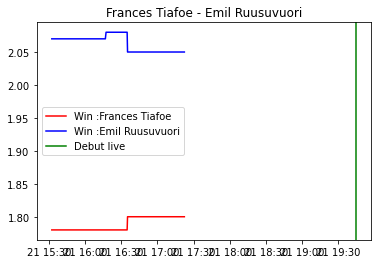

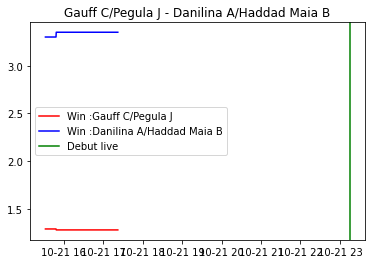

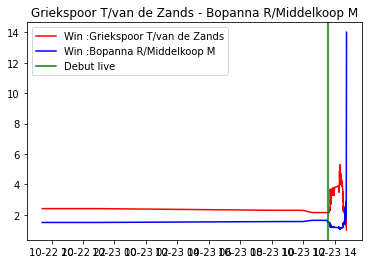

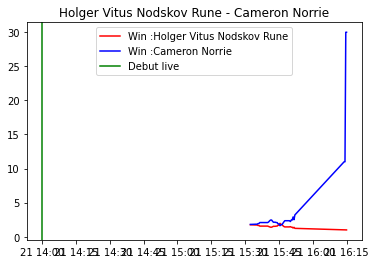

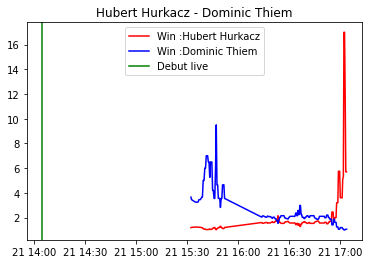

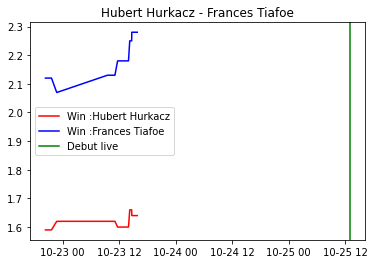

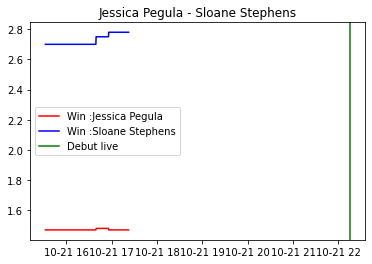

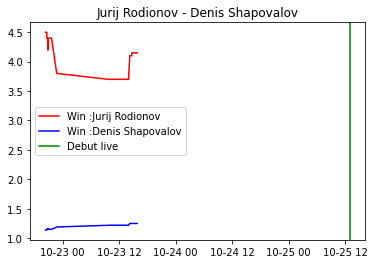

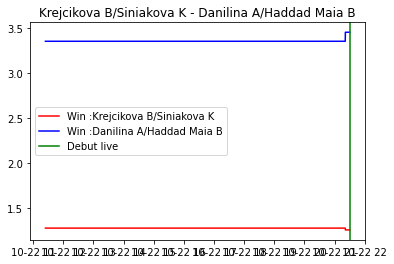

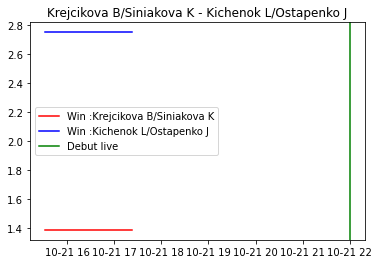

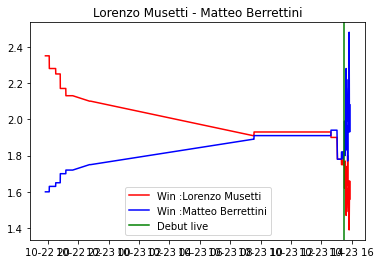

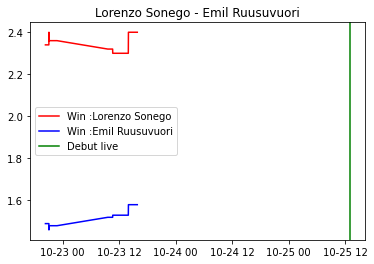

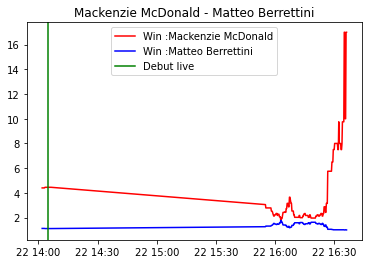

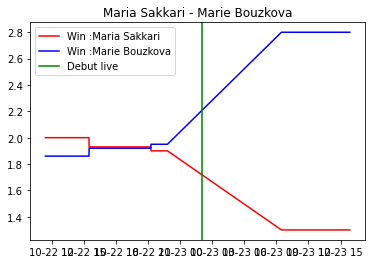

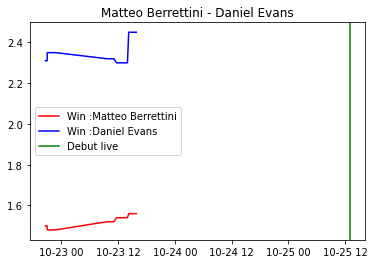

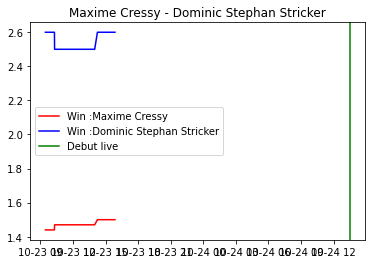

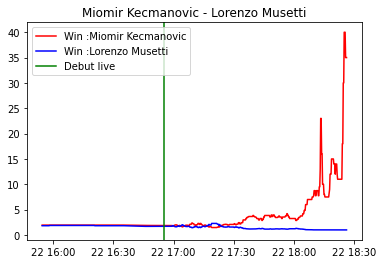

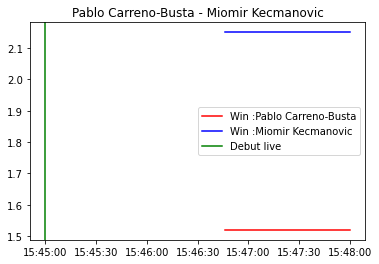

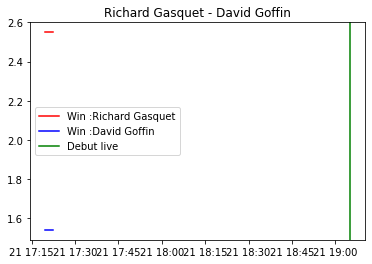

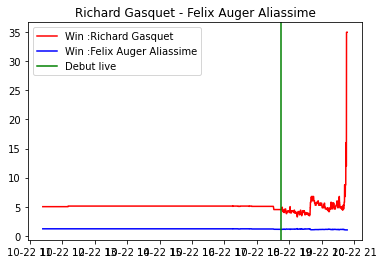

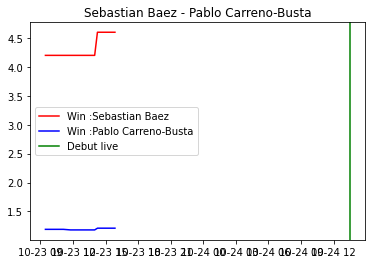

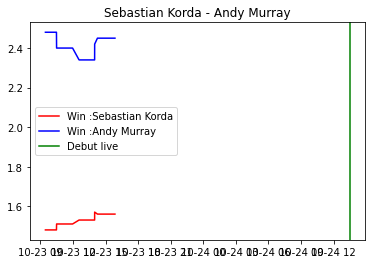

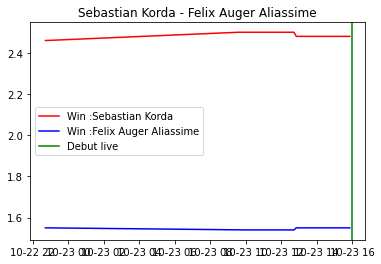

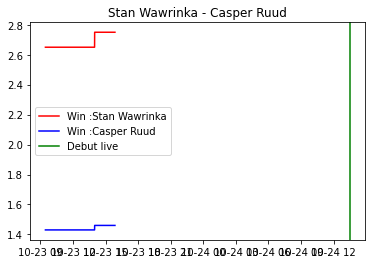

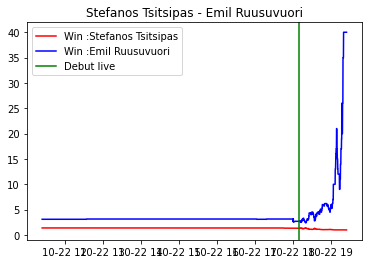

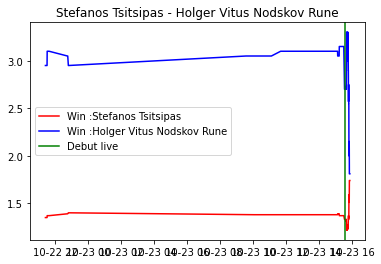

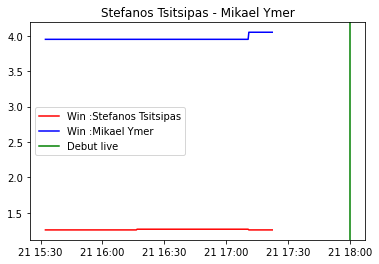

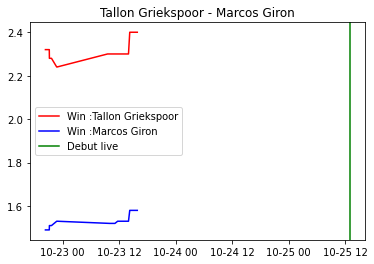

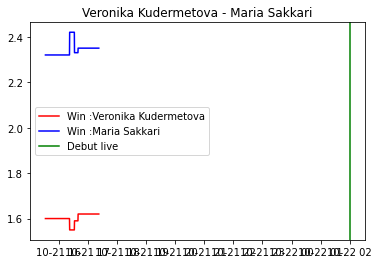

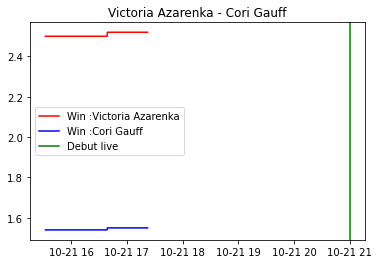

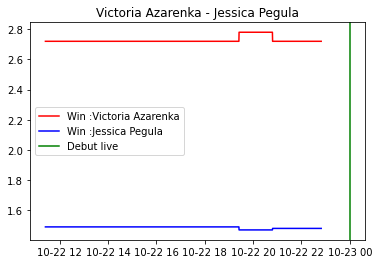

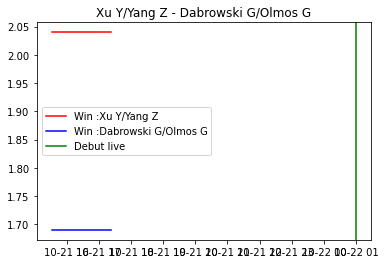

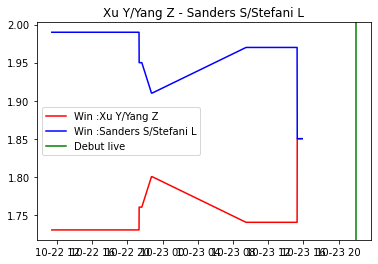

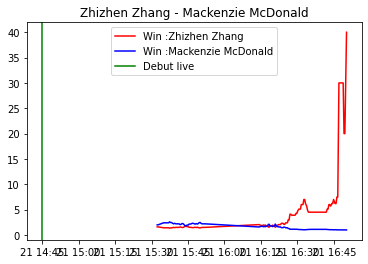

In [132]:
for i in plot_list:
    # print(len(i[1])," = ",len(i[2])," = ",len(i[3])," ==> ",(len(i[1])==len(i[2])) and (len(i[1])==len(i[3])))
    if (1/((1/max(i[2]))+(1/max(i[3])))-1)*100 <=0:
        valide = ("\033[91m{}X \x1b[0m").format(" "*(15-len("{:.2f}".format((1/((1/max(i[2]))+(1/max(i[3])))-1)*100) ) ) )
    else:
        valide = ("\033[92m{}V \x1b[0m").format(" "*(15-len("{:.2f}".format((1/((1/max(i[2]))+(1/max(i[3])))-1)*100) ) ) )
    print("{}{}\033[95m|| \x1b[0m{}{}   --   {}{} \033[95m ==> \x1b[0m   {:.2f} %  {} ".format(i[0],' '*(50-len(i[0]))   ,max(i[2]),' '*(4-len(str(max(i[2])))),max(i[3]),' '*(4-len(str(max(i[3])))),(1/((1/max(i[2]))+(1/max(i[3])))-1)*100,valide))
    plt.figure()
    plt.plot_date(i[1],i[2], 'r',label=("Win :"+str(i[0].split(' - ')[0])))
    plt.plot_date(i[1],i[3], 'b',label=("Win :"+str(i[0].split(' - ')[1])))

    # plt.ylim(ymax=5)
    
    plt.axvline(x = i[4], color = 'g', label = 'Debut live')
    plt.legend()
    plt.title(i[0])
# plt.plot(, [1, 2, 3, 4])

In [133]:
#test stategie 1
text = " STATEGIE 1 "
print(f"\033[96m {text:=^100}\n\x1b[0m")

list_file =  glob.glob("CSV/*")
for file in list_file:
    df = pd.read_csv(file)
    bon = True
    try:
        maxi = df[df.Live == False].Win.max()
        if maxi<df[df.Live == False].Lose.max():
            maxi = df[df.Live == False].Lose.max()
            maxi_2= df[df.Live == True].Win.max()
        else:
            maxi_2= df[df.Live == True].Lose.max()
    except:
        bon = False
    
    if bon and (not np.isnan(maxi)) and (not np.isnan(maxi_2)):
        if (1/((1/maxi)+(1/maxi_2))-1)*100 <=0:
            check = ("\033[91m X \x1b[0m")
        else:
            check = ("\033[92m V \x1b[0m")
        
        name = file.split("\\")[1].split("__")
        if len(name) == 4:
            name = (name[1]+" - "+name[2]).replace("_"," ")
        elif len(name) == 8:
            name = (name[1]+"/"+name[3]+" - "+name[4]+"/"+name[6]).replace("_"," ")
        else:
            print("len(name) not 4 and 8 : {}".format(name))

        print("{}{}{} ==> {} {} : {}  {:.2f} % ".format(name," "*(60-len(name)),maxi,maxi_2," "*(8-(len(str(maxi))+len(str(maxi_2)))),check,(1/((1/maxi)+(1/maxi_2))-1)*100))
print(f"\n\033[96m {text:=^100}\n\n\x1b[0m")

 ============================================ STATEGIE 1 ============================================

Alex De Minaur - Holger Vitus Nodskov Rune                  2.32 ==> 6.2   :  V   68.83 % 
Arevalo M/Rojer J - Glasspool L/Heliovaara H                2.1 ==> 1.86   :  X   -1.36 % 
Dodig I/Krajicek A - Ebden M/Peers J                        2.02 ==> 4.8   :  V   42.17 % 
Griekspoor T/van de Zands - Bopanna R/Middelkoop M          2.41 ==> 14.0  :  V   105.61 % 
Lorenzo Musetti - Matteo Berrettini                         2.35 ==> 2.48  :  V   20.66 % 
Maria Sakkari - Marie Bouzkova                              2.0 ==> 2.8    :  V   16.67 % 
Miomir Kecmanovic - Lorenzo Musetti                         1.96 ==> 2.28  :  V   5.40 % 
Richard Gasquet - Felix Auger Aliassime                     5.1 ==> 1.22   :  X   -1.55 % 
Stefanos Tsitsipas - Emil Ruusuvuori                        3.15 ==> 1.42  :  X   -2.12 % 
Stefanos Tsitsipas - Holger Vitus Nodskov Rune              3.15 ==> 1.74  :  

In [134]:
Xmax = 1.96
gain =2 #en €

x = 1/((1/((gain/100)+1))-(1/Xmax))
print("{} ==> {} pour un gain de {} €".format(Xmax,x,gain))


1.96 ==> 2.126808510638298 pour un gain de 2 €
